# The data used to perform this analysis:
### 3 Folders containing 50 CSV files with waveform data 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from statistics import mean
import math
from math import log
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,10)

In [7]:
path1 = os.path.expanduser(os.path.expanduser("~/Desktop/1000V"))
path2 = os.path.expanduser(os.path.expanduser("~/Desktop/1200V"))
path3 = os.path.expanduser(os.path.expanduser("~/Desktop/1300V"))

files1 = []
files2 = []
files3 = []


for r, d, f in os.walk(path1):
    for file in f:
        if '.CSV' in file:
            files1.append(os.path.join(r, file))
            
for r, d, f in os.walk(path2):
    for file in f:
        if '.CSV' in file:
            files2.append(os.path.join(r, file))
            
for r, d, f in os.walk(path3):
    for file in f:
        if '.CSV' in file:
            files3.append(os.path.join(r, file))
            
v1 = []
v2 = []
v3 = []
thresh1 = []
thresh2 = []
thresh3 = []
acc = []

###~170,000 pulses detected per trial # MAKE SURE TO HAVE 3 FOLDERS: 1000V, 1200V, etc... on your desktop
for file in files1:
    df = pd.read_csv(file)
    df = df['4000'].loc[15:]
      
    filtered = df[df.astype(float) <= -.004]  #Applying a thresh hold of -5 mV
    voltages = df.values.tolist() #All the data
    v1.extend(voltages) 
    thresh1.extend(filtered)
    
for file in files2:
    df = pd.read_csv(file)
    df = df['4000'].loc[15:]
    
    filtered = df[df.astype(float) <= -.004]  #Applying a thresh hold of -5 mV
    voltages = df.values.tolist() #All the data
    v2.extend(voltages) 
    thresh2.extend(filtered)
    
for file in files3:
    try:
        df = pd.read_csv(file)
        df = df['4000'].loc[15:]
        filtered = df[df.astype(float) <= -.004]  #Applying a thresh hold of -5 mV
        voltages = df.values.tolist() #All the data
        v3.extend(voltages) 
        thresh3.extend(filtered)
    except Exception:
        print("")

v1 = [(float(x)*-1) for x in v1]
v2 = [(float(x)*-1) for x in v2]
v3 = [(float(x)*-1) for x in v3]

thresh1 = [(float(x)*-1) for x in thresh1]
thresh2 = [(float(x)*-1) for x in thresh2]
thresh3 = [(float(x)*-1) for x in thresh3]

max1 = [(float(x)*-1) for x in max1]
max2 = [(float(x)*-1) for x in max2]
max3 = [(float(x)*-1) for x in max3]

acc = [[(float(x)*-1) for x in acc]]


NameError: name 'max1' is not defined

In [9]:
noise1avg = str((sum(v1)/len(v1))*1000)
noise2avg = str((sum(v2)/len(v2))*1000)
noise3avg = str((sum(v3)/len(v3))*1000)
signal1 = str((sum(thresh1)/len(thresh1))*1000)
signal2 = str((sum(thresh2)/len(thresh2))*1000)
signal3 = str((sum(thresh3)/len(thresh3))*1000)
print("At 1000V: Average of all noise: " + noise1avg + "mV, Average of possible signals: " + signal1 + "mV")
print("At 1200V: Average of all noise: " + noise2avg + "mV, Average of possible signals: " + signal2 + "mV") 
print("At 1300V: Average of all noise: " + noise3avg + "mV, Average of possible signals: " + signal3 + "mV")

At 1000V: Average of all noise: 0.35043023255798855mV, Average of possible signals: 5.190755555555569mV
At 1200V: Average of all noise: 0.40181100000037967mV, Average of possible signals: 9.186952688804038mV
At 1300V: Average of all noise: 0.4305411764700976mV, Average of possible signals: 11.8208092485549mV


<function matplotlib.pyplot.show(*args, **kw)>

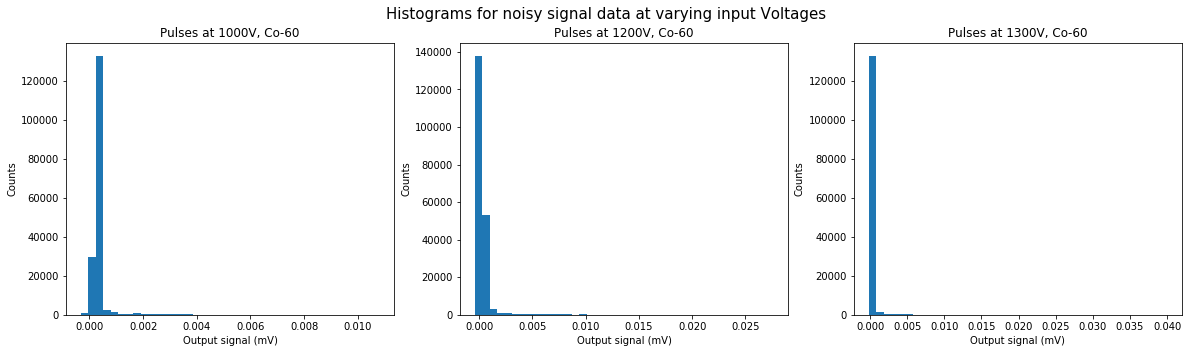

In [10]:
fig = plt.figure(3, (20,5))

fig.suptitle('Histograms for noisy signal data at varying input Voltages', fontsize = 15)
plt.subplot(1,3,1)
plt.hist(v1, bins = 40)
plt.title("Pulses at 1000V, Co-60")
plt.xlabel("Output signal (mV)")
plt.ylabel("Counts")

plt.subplot(1,3,2)
plt.hist(v2, bins = 40)
plt.title("Pulses at 1200V, Co-60")
plt.xlabel("Output signal (mV)")
plt.ylabel("Counts")

plt.subplot(1,3,3)
plt.hist(v3, bins = 40)
plt.title("Pulses at 1300V, Co-60")
plt.xlabel("Output signal (mV)")
plt.ylabel("Counts")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

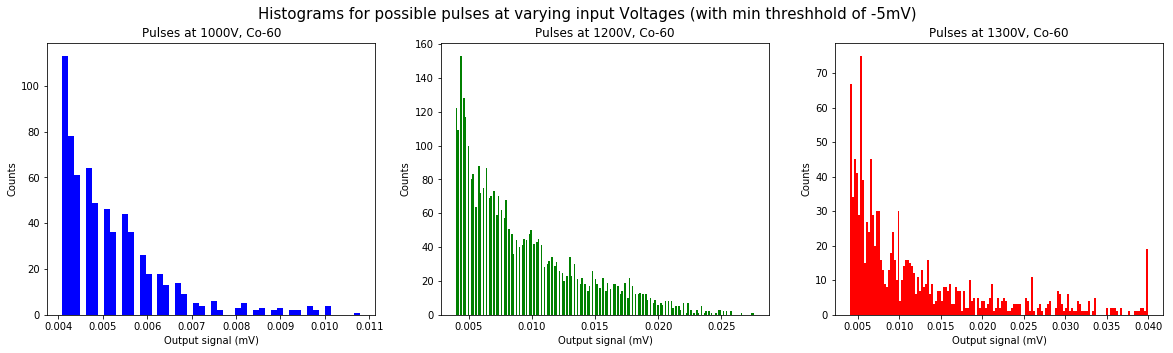

In [11]:
fig = plt.figure(3, (20,5))
fig.suptitle('Histograms for possible pulses at varying input Voltages (with min threshhold of -5mV)', fontsize = 15)
plt.subplot(1,3,1)
plt.hist(thresh1, histtype = 'stepfilled', bins = 50, color='b')
plt.title("Pulses at 1000V, Co-60")
plt.xlabel("Output signal (mV)")
plt.ylabel("Counts")

plt.subplot(1,3,2)
plt.hist(thresh2, histtype = 'stepfilled', bins = 200, color='g')
plt.title("Pulses at 1200V, Co-60")
plt.xlabel("Output signal (mV)")
plt.ylabel("Counts")

plt.subplot(1,3,3)
plt.hist(thresh3, histtype = 'stepfilled', bins = 150, color='r')
plt.title("Pulses at 1300V, Co-60")
plt.xlabel("Output signal (mV)")
plt.ylabel("Counts")

plt.show

# Observations
### Increasing the voltage increases the number of signals exceeding a threshhold of 5 mV, and the average pulse size
### At 1000V: Average of all noise: 0.350 mV, Average of pulse sizes: 6.14 mV, pulses detected: 310
### At 1200V: Average of all noise: 0.401 mV, Average of pulse sizes: 10.3 mV, pulses detected: 2774
### At 1300V: Average of all noise: 0.431 mV, Average of pulse sizes: 13.2 mV, pulses detected: 1024
### .

In [ ]:
path1 = os.path.expanduser(os.path.expanduser("~/Desktop/LOG0011"))
files4 = []
v4 = []
thresh4 = []
max4 = []
for r, d, f in os.walk(path1):
    for file in f:
        if '.CSV' in file:
            files4.append(os.path.join(r, file))


for file in files4:
    df = pd.read_csv(file)
    df = df['Memory Length'].loc[15:]
    #voltages = df.values.tolist() #All the data
#        voltages = df.values.tolist() #All the data

    df = df.astype(float)*(-2/5)
    filtered = df[df.astype(float) >= 4]  #Applying a thresh hold of -5 mV
    thresh4.extend(filtered)
    
thresh4 = [(float(x)) for x in thresh4]

<function matplotlib.pyplot.show(*args, **kw)>

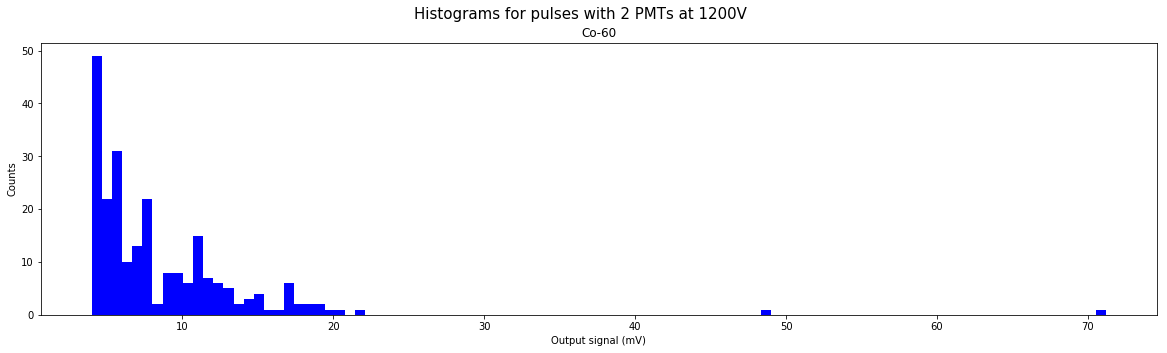

In [8]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Histograms for pulses with 2 PMTs at 1200V', fontsize = 15)
plt.hist(thresh4, histtype = 'stepfilled', bins=100, color='b')
plt.title("Co-60")
plt.xlabel("Output signal (mV)")
plt.ylabel("Counts")



plt.show

In [7]:
# (Beta Sr - (90)) @ 2:57 PM


#Objective: Determine correlation between voltage input and signal output. 

    
# -1300 V = -10.8 mV  
# -1200 V = -9.29 mV
# -1000 V = -8.39 mV
# -900 V = -3.03 mV


# Beta Sr Cont. @ 3:40

### Could not find any peaks with the terminator on past this point, so we removed it for voltages past -900 V
# -800 V = -3.51 mV
# -700 V = -1.03 mV
# -600 V = -.72 mV
# -500 V = -.16 mV (Upper limit)

### Observation: the lower the magnitude of the input voltage, the lesser the magnitude of output signal 
### Observation: # Attempted to use Jupyter notebook to visualize a distribution of wave signals, but not so effective with minimal 
# hand-collected data

In [8]:
# Cobalt: Co-60 @ 4:30 PM

# Extracting 50 CSV Files for Cobalt's waveforms at -1000 V and -1200 V, respectively
# Objective: Iterate through each CSV file, determine absolute maximum of each waveform
# Objective: Create a distribuion of these maximums, find correlations between Voltage / material / output voltage
# Completed data pull @ 4:39 PM